## SyrialTel Customer Churn

### Problem Statement: Predicting Customer Churn for SyriaTel
`Customer Churn` refers to the phenomenon where customers stop using a company's products or services. In telecommunications industry, churn occurs when a subscriber cancels their service, switches to a competitor, or stops engaging with the company altogether

For Syrialtel, a telcom provider, high churn rates lead to significant revenue losses, increased customer acquisition costs, and a weakened market position.Retaining existing customers is generally more cost-effective than acquiring new ones, making churn prediction a critical business priority.

### Disadvantages of Customer Churn:
1. Revenue loss - Losing customers reduces recurring revenue, impacting overall profitability
2. Higher Acquisition Costs - Acquiring new customers is often more expensive than retaining existiong ones.
3. Reputational Damage - High churn ratess may inidcate poor service quality,leading to negative word-of-mouth
4. Reduced Customer Lifetime Value (CLV) - Frequent customer exits lower the long-tern revenue a company can generate from each user
5. Operational Inefficiencies - constantly replacing lost customers requires continous marketing and sales efforts, increase costs

### Objective
The goal is to build a predictive model that identifies customers who are likely to churn in the near future. By analyzing patterns in customer behaviour, the company can implement targeted retetion strategies, such as personalized offers, improved customer support, or proactive engagement, to reduced churn and enhance customer loyalty

### 1.0 Import Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import classification_report,roc_auc_score,accuracy_score,precision_score,recall_score,f1_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

C:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


### 2.0 Understanding the dataset

In [2]:
#Read file from the csv as a dataframe and display the first 5 rows
df = pd.read_csv('CustomerChurnData.csv')
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

### Data Description /Features in the Dataset
This features will help in determining if there is a pattern in customers that have churned versus customers that have not

- `state` : state the customer lives in
- `Account length` : The number of days the customer has had the account
- `Area code` : the area code of the customer
- `Phone number` : The phone number of the customer
- `Internation plan` : true if the customer has the international plan, otherwise false
- `Voice mail plan` : true if the customer has the voice mail plan, otherwise false
- `number vmail messages` : Number of voicemails the customer has sent
- `total day minutes` : total number of minutes the customer has used in calls made during the day
- `total day calls` : total number of calls the user has done during the day
- ` total day charge` : total amount of money the customer was charged by the Telecom company for calls made during the day
- `total eve minutes` : total number of minutes the customer has used in calls made in the evening
- `total eve calls` : total number of calls the user has done in the evening
- `total eve charge` : total amount of money the customer was charged by the Telecom company for calls made in the evening
- `total night minutes` : total number of minutes the customer has used during the night 
- `total night calls` : total number of calls the user has done during the night
- `total night charge` : total amount of money the customer was charged by the Telecom company for calls made at night`
- `total intl minutes`: total number of minutes the user has been in international calls
- `total intl calls` : total number of international calls the customer has done 
- `total intl charge`: total amount of monye the customer was charged by the Telcom company for international calls
- `customer service calls` : number of calls the customer has mase to customer service
- `churn` - true if the customer terminated their contract, otherwise false

In [3]:
# Check the number of records and features using the .shape method
print(f'The dataset has {df.shape[0]} rows')
print(f'The dataset has {df.shape[1]} columns')

The dataset has 3333 rows
The dataset has 21 columns


In [4]:
#check information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

They are no missing values in the dataset.The object types colums will be one-hot encododed to integers prior to modelling

In [5]:
#confirming they are no missing values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [6]:
#check data statistics for numerics
df.describe().T

count        mean        std     min     25%     50%  \
account length          3333.0  101.064806  39.822106    1.00   74.00  101.00   
area code               3333.0  437.182418  42.371290  408.00  408.00  415.00   
number vmail messages   3333.0    8.099010  13.688365    0.00    0.00    0.00   
total day minutes       3333.0  179.775098  54.467389    0.00  143.70  179.40   
total day calls         3333.0  100.435644  20.069084    0.00   87.00  101.00   
total day charge        3333.0   30.562307   9.259435    0.00   24.43   30.50   
total eve minutes       3333.0  200.980348  50.713844    0.00  166.60  201.40   
total eve calls         3333.0  100.114311  19.922625    0.00   87.00  100.00   
total eve charge        3333.0   17.083540   4.310668    0.00   14.16   17.12   
total night minutes     3333.0  200.872037  50.573847   23.20  167.00  201.20   
total night calls       3333.0  100.107711  19.568609   33.00   87.00  100.00   
total night charge      3333.0    9.039325   2.275873    1.04    7.52    9.05   
total intl minutes      3333.0   10.237294   2.791840    0.00    8.50   10.30   
total intl calls        3333.0    4.479448   2.461214    0.00    3.00    4.00   
total intl charge       3333.0    2.764581   0.753773    0.00    2.30    2.78   
customer service calls  3333.0    1.562856   1.315491    0.00    1.00    1.00   

                           75%     max  
account length          127.00  243.00  
area code               510.00  510.00  
number vmail messages    20.00   51.00  
total day minutes       216.40  350.80  
total day calls         114.00  165.00  
total day charge         36.79   59.64  
total eve minutes       235.30  363.70  
total eve calls         114.00  170.00  
total eve charge         20.00   30.91  
total night minutes     235.30  395.00  
total night calls       113.00  175.00  
total night charge       10.59   17.77  
total intl minutes       12.10   20.00  
total intl calls          6.00   20.00  
total intl charge         3.27    5.40  
customer service calls    2.00    9.00

In [7]:
total_day_charge_per_min = (df['total day charge']/df['total day minutes']).mean()
total_eve_charge_per_min = (df['total eve charge']/df['total eve minutes']).mean()
total_night_charge_per_min = (df['total night charge']/df['total night minutes']).mean()
total_intl_charge_per_min = (df['total intl charge']/df['total intl minutes']).mean()
print(f'total_day_charge_per_min: {total_day_charge_per_min}')
print(f'total_eve_charge_per_min: {total_eve_charge_per_min}')
print(f'total_night_charge_per_min: {total_night_charge_per_min}')
print(f'total_intl_charge_per_min: {total_intl_charge_per_min}')

total_day_charge_per_min: 0.1700032343416007
total_eve_charge_per_min: 0.08500117298813906
total_night_charge_per_min: 0.045000345702212
total_intl_charge_per_min: 0.27005654558216496


- Customer that stayed for long with the company is 243 days and on average 101 days.
- on average voice mail messages 0 showing that voice mail messages are not as frequent
- Phone calls last longer in the evening and at night. We also see that that night time calling is the cheapest(0.045 Euros per min), followed by evening which is almost double( 0.085 Euros per min) and during the days almost four times compared to night time(0.17 Euros per min). Lesser international calls are made probably due to high ratings(0.27 Euros per min)
- Customer service calls on average are low (1 call) whixh could mean overall customer satisafaction but maximum of 9  could show customer disatisfaction.
- We will also need to scale the data due to the different scales used in the dataset as shown by the min and max values for each columns

In [8]:
#statitiscs for strings
df.describe(include='O')

state phone number international plan voice mail plan
count   3333         3333               3333            3333
unique    51         3333                  2               2
top       WV     382-4657                 no              no
freq     106            1               3010            2411

In [9]:
#value counts for categorical columns
print(df['international plan'].value_counts(normalize=True))
print(df['voice mail plan'].value_counts(normalize=True))

no     0.90309
yes    0.09691
Name: international plan, dtype: float64
no     0.723372
yes    0.276628
Name: voice mail plan, dtype: float64


Low subscriptions seen on international plan(almost 10% of customers have subscribed) and voice mail plan(almost 28% of customers have subscribed).
Phone numbers does determine whether a customer churned or not we will drop that column.
We will need to one hot encode this columms durig the modelling process

In [10]:
df['state'].value_counts(normalize=True)

WV    0.031803
MN    0.025203
NY    0.024902
AL    0.024002
WI    0.023402
OH    0.023402
OR    0.023402
WY    0.023102
VA    0.023102
CT    0.022202
MI    0.021902
ID    0.021902
VT    0.021902
TX    0.021602
UT    0.021602
IN    0.021302
MD    0.021002
KS    0.021002
NC    0.020402
NJ    0.020402
MT    0.020402
CO    0.019802
NV    0.019802
WA    0.019802
RI    0.019502
MA    0.019502
MS    0.019502
AZ    0.019202
FL    0.018902
MO    0.018902
NM    0.018602
ME    0.018602
ND    0.018602
NE    0.018302
OK    0.018302
DE    0.018302
SC    0.018002
SD    0.018002
KY    0.017702
IL    0.017402
NH    0.016802
AR    0.016502
GA    0.016202
DC    0.016202
HI    0.015902
TN    0.015902
AK    0.015602
LA    0.015302
PA    0.013501
IA    0.013201
CA    0.010201
Name: state, dtype: float64

We see an almost equal distribution in the number of states with WV having the highest number od customers

In [11]:
#Statistics for the churn column
df.describe(include='bool')

churn
count    3333
unique      2
top     False
freq     2850

In [12]:
#value count for churned column
df['churn'].value_counts(normalize = True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

Majority of customers did not churn(86%) indicating an imbalance in the traget variable . The class imbalance needs to be addressed during modelling to preveny overrepresenation fo the majority class and ensure accurate predictions

### 3.0 Data Cleaning

In [13]:
#check for duplicates
df.duplicated().sum()

0

No duplicates in the dataset

In [14]:
#drop phone number and Area Code
df.drop(['phone number','area code'],axis=1,inplace=True)
#confirm drop
df.head()

state  account length international plan voice mail plan  \
0    KS             128                 no             yes   
1    OH             107                 no             yes   
2    NJ             137                 no              no   
3    OH              84                yes              no   
4    OK              75                yes              no   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

We drop the phone number and Area Code since they do not  determine customer churn

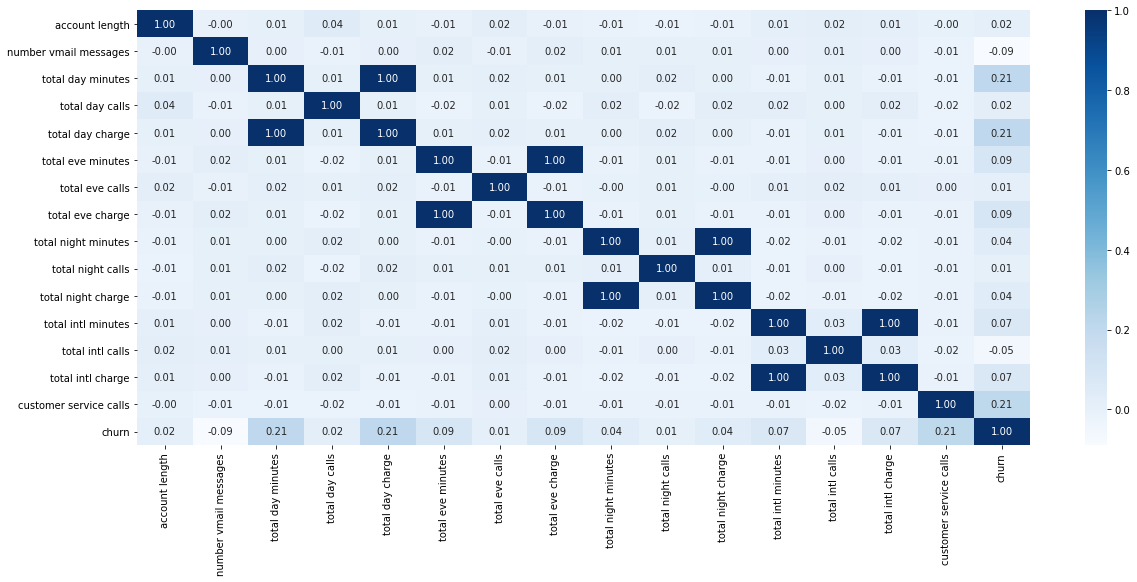

In [15]:
# check correlated features
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Blues');

- total day charge and total day minutes have a perfect correlation suggesting total day charge might be derived from total day minutes.similarly total evening/night/international minutes and their charges sre perfectly correlated.We will need to remove one of the features that are pefectly correlated ro remove multicolinearity in machine learning models
- total day minutes and customer service calls have highest correlation with churn in this dataset. This could mean that  high usage could lead to higher bills,casuing dissatisfaction. High no of customer service calls also shows dissatisfaction which could lead to customer churn.


In [16]:
# remove correlated features

#compute the correlation matrix
corr_matrix = df.corr().abs()

#set correlation threshold
threshold = 0.9

#create an upper triangle matrix to avoid duolicate checks
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

#drop correlated columns
df= df.drop(columns =to_drop)
print(f'Removed correlated features: {to_drop}')

Removed correlated features: ['total day charge', 'total eve charge', 'total night charge', 'total intl charge']


In [27]:
# make a copy of the cleaned dataframe
customer_churn = df.copy(deep=True)
customer_churn

state  account length international plan voice mail plan  \
0       KS             128                 no             yes   
1       OH             107                 no             yes   
2       NJ             137                 no              no   
3       OH              84                yes              no   
4       OK              75                yes              no   
...    ...             ...                ...             ...   
3328    AZ             192                 no             yes   
3329    WV              68                 no              no   
3330    RI              28                 no              no   
3331    CT             184                yes              no   
3332    TN              74                 no             yes   

      number vmail messages  total day minutes  total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      total eve minutes  total eve calls  total night minutes  \
0                 197.4               99                244.7   
1                 195.5              103                254.4   
2                 121.2              110                162.6   
3                  61.9               88                196.9   
4                 148.3              122                186.9   
...                 ...              ...                  ...   
3328              215.5              126                279.1   
3329              153.4               55                191.3   
3330              288.8               58                191.9   
3331              159.6               84                139.2   
3332              265.9               82                241.4   

      total night calls  total intl minutes  total intl calls  \
0                    91                10.0                 3   
1                   103                13.7                 3   
2                   104                12.2                 5   
3                    89                 6.6                 7   
4                   121                10.1                 3   
...                 ...                 ...               ...   
3328                 83                 9.9                 6   
3329                123                 9.6                 4   
3330                 91                14.1                 6   
3331                137                 5.0                10   
3332                 77                13.7                 4   

      customer service calls  churn  
0                          1  False  
1                          1  False  
2                          0  False  
3                          2  False  
4                          3  False  
...                      ...    ...  
3328                       2  False  
3329                       3  False  
3330                       2  False  
3331                       2  False  
3332                       0  False  

[3333 rows x 15 columns]

### 4.0 Exploratory Data Analysis